# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size=0.3)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12752,-121.37,38.62,43.0,1077.0,199.0,447.0,182.0,3.0139,115600.0,0,1,0,0,0
14271,-117.12,32.70,38.0,818.0,217.0,953.0,231.0,1.0531,65700.0,0,0,0,0,1
2870,-118.95,35.37,34.0,1672.0,359.0,1059.0,349.0,2.1588,61300.0,0,1,0,0,0
7387,-118.25,33.97,37.0,794.0,210.0,814.0,213.0,2.2917,112000.0,1,0,0,0,0
18366,-122.08,37.24,21.0,427.0,63.0,182.0,70.0,11.3283,500001.0,1,0,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
test['total_rooms'] /= test['households']
test['total_bedrooms'] /= test['households']
test.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [9]:
validation['total_rooms'] /= validation['households']
validation['total_bedrooms'] /= validation['households']
validation.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [10]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12752,-121.37,38.62,43.0,5.917582,1.093407,447.0,182.0,3.0139,115600.0,0,1,0,0,0
14271,-117.12,32.70,38.0,3.541126,0.939394,953.0,231.0,1.0531,65700.0,0,0,0,0,1
2870,-118.95,35.37,34.0,4.790831,1.028653,1059.0,349.0,2.1588,61300.0,0,1,0,0,0
7387,-118.25,33.97,37.0,3.727700,0.985915,814.0,213.0,2.2917,112000.0,1,0,0,0,0
18366,-122.08,37.24,21.0,6.100000,0.900000,182.0,70.0,11.3283,500001.0,1,0,0,0,0


In [11]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7229,-118.16,34.02,44.0,3.561404,1.093567,1175.0,342.0,1.9688,173900.0,1,0,0,0,0
1476,-122.04,37.96,16.0,4.203463,1.043290,1705.0,693.0,2.9097,106300.0,0,0,0,1,0
10545,-117.75,33.71,15.0,5.478846,1.032692,878.0,520.0,3.2841,158300.0,1,0,0,0,0
10555,-117.71,33.63,16.0,5.475877,1.096491,1357.0,456.0,4.5909,241800.0,1,0,0,0,0
10967,-117.89,33.76,34.0,5.223881,1.044776,723.0,201.0,4.8000,192700.0,1,0,0,0,0


In [12]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8412,-118.35,33.94,38.0,3.951542,1.118943,2188.0,454.0,2.6654,142200.0,1,0,0,0,0
9674,-118.74,37.58,20.0,7.368304,1.738839,1085.0,448.0,3.7315,159300.0,0,1,0,0,0
18600,-122.18,37.15,17.0,6.200000,1.229787,591.0,235.0,5.5785,284100.0,0,0,0,0,1
15090,-116.92,32.81,17.0,3.893175,1.169139,836.0,337.0,1.6686,112500.0,1,0,0,0,0
17026,-122.27,37.51,36.0,5.932489,0.945148,598.0,237.0,5.8964,414800.0,0,0,0,0,1


4) Определение кол-ва отсутствующих значений и их удаление

In [13]:
print('train: ',train['average_bedrooms'].isnull().sum())

train:  70


In [14]:
train_no_null = train.dropna(axis=0)
print(train_no_null.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
average_rooms                 0
average_bedrooms              0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [15]:
X_train, y_train = train_no_null[['average_rooms']], train_no_null['average_bedrooms']
# print(type(train_no_null['average_rooms']))
# print(type(train_no_null[['average_rooms']]))

In [16]:
clf = LinearRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print('RMSE: {}'.format(np.sqrt(MSE(y_train, predictions))))

RMSE: 0.23259893921741134


In [17]:
train_nan_bedrooms = train['average_bedrooms'].isnull()
train_nan_rooms = train.loc[train_nan_bedrooms, ['average_rooms']]
train.loc[train_nan_bedrooms, 'average_bedrooms'] = clf.predict((train_nan_rooms))
print(train['average_bedrooms'].isnull().sum())

0


In [18]:
test_nan_bedrooms = test['average_bedrooms'].isnull()
test_nan_rooms = test.loc[test_nan_bedrooms, ['average_rooms']]
test.loc[test_nan_bedrooms, 'average_bedrooms'] = clf.predict((test_nan_rooms))
print(test['average_bedrooms'].isnull().sum())

0


In [19]:
validation_nan_bedrooms = validation['average_bedrooms'].isnull()
validation_nan_rooms = validation.loc[validation_nan_bedrooms, ['average_rooms']]
validation.loc[validation_nan_bedrooms, 'average_bedrooms'] = clf.predict((validation_nan_rooms))
print(validation['average_bedrooms'].isnull().sum())

0


5) Нормализация признаков longitude и latitude

In [20]:
ss  = StandardScaler().fit(train[['longitude','latitude']])

In [21]:
train[['longitude', 'latitude']] = ss.transform(train[['longitude', 'latitude']])
test[['longitude', 'latitude']] = ss.transform(test[['longitude', 'latitude']])
validation[['longitude', 'latitude']] = ss.transform(validation[['longitude', 'latitude']])

In [22]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
12752,-0.895876,1.406506,43.0,5.917582,1.093407,447.0,182.0,3.0139,115600.0,0,1,0,0,0
14271,1.224513,-1.379526,38.0,3.541126,0.939394,953.0,231.0,1.0531,65700.0,0,0,0,0,1
2870,0.311498,-0.122988,34.0,4.790831,1.028653,1059.0,349.0,2.1588,61300.0,0,1,0,0,0
7387,0.660739,-0.781847,37.0,3.727700,0.985915,814.0,213.0,2.2917,112000.0,1,0,0,0,0
18366,-1.250106,0.757059,21.0,6.100000,0.900000,182.0,70.0,11.3283,500001.0,1,0,0,0,0


In [23]:
print('longitude mean: {}'.format(train['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(train['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(train['latitude'].to_numpy().std(axis = 0)))

longitude mean: -2.9232184533208994e-15
longitude std: 1.0
latitude mean: -2.422081238661748e-15
latitude std: 1.0


In [24]:
test.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7229,0.705641,-0.758316,44.0,3.561404,1.093567,1175.0,342.0,1.9688,173900.0,1,0,0,0,0
1476,-1.230150,1.095901,16.0,4.203463,1.043290,1705.0,693.0,2.9097,106300.0,0,0,0,1,0
10545,0.910196,-0.904207,15.0,5.478846,1.032692,878.0,520.0,3.2841,158300.0,1,0,0,0,0
10555,0.930153,-0.941856,16.0,5.475877,1.096491,1357.0,456.0,4.5909,241800.0,1,0,0,0,0
10967,0.840348,-0.880676,34.0,5.223881,1.044776,723.0,201.0,4.8000,192700.0,1,0,0,0,0


In [25]:
print('longitude mean: {}'.format(test['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(test['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(test['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(test['latitude'].to_numpy().std(axis = 0)))

longitude mean: 0.006660258270428649
longitude std: 0.9979902364402868
latitude mean: -0.004268463419766647
latitude std: 1.0061241896688857


In [26]:
validation.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8412,0.610847,-0.795965,38.0,3.951542,1.118943,2188.0,454.0,2.6654,142200.0,1,0,0,0,0
9674,0.416270,0.917068,20.0,7.368304,1.738839,1085.0,448.0,3.7315,159300.0,0,1,0,0,0
18600,-1.299998,0.714704,17.0,6.200000,1.229787,591.0,235.0,5.5785,284100.0,0,0,0,0,1
15090,1.324296,-1.327759,17.0,3.893175,1.169139,836.0,337.0,1.6686,112500.0,1,0,0,0,0
17026,-1.344900,0.884125,36.0,5.932489,0.945148,598.0,237.0,5.8964,414800.0,0,0,0,0,1


In [27]:
print('longitude mean: {}'.format(validation['longitude'].to_numpy().mean(axis = 0)))
print('longitude std: {}'.format(validation['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(validation['latitude'].to_numpy().mean(axis = 0)))
print('latitude std: {}'.format(validation['latitude'].to_numpy().std(axis = 0)))

longitude mean: 0.000914401363591636
longitude std: 1.0004748772963208
latitude mean: 0.004365422131481873
latitude std: 1.009520849437797


# 2 часть

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [29]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [31]:
train, test = train_test_split(df, test_size=0.5)

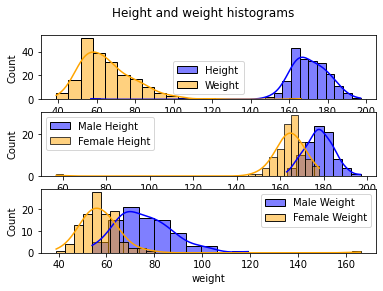

In [32]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [33]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

C:\Users\fenryux\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [34]:
train.head()

,sex,weight,height,repwt,repht
177,0,66,170,67.0,165.0
158,1,58,169,NaN,NaN
76,1,50,160,55.0,150.0
131,0,87,185,89.0,185.0
34,1,68,169,63.0,170.0


In [35]:
test.head()

,sex,weight,height,repwt,repht
87,1,53,165,53.0,165.0
149,0,88,184,86.0,183.0
41,0,80,178,80.0,178.0
113,0,67,179,67.0,179.0
137,1,62,167,NaN,NaN


In [36]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.89


In [37]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.91


C:\Users\fenryux\AppData\Local\Temp/ipykernel_10748/3351774255.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_10748/3351774255.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


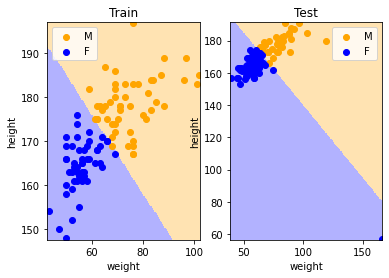

In [38]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Train')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Test')
ax[1].legend()

# 2.2

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [40]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [41]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [42]:
validation, test = train_test_split(df, test_size=0.5)

In [43]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [44]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [45]:
clf = LinearRegression().fit(X_validation, y_validation)
print('Score: ', clf.score(X_validation, y_validation))

Score:  0.9303588088754959


In [46]:
predictions = clf.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

R2 =  0.9251458787081537
MSE =  20.28908564551151


Text(0, 0.5, 'Оценка')

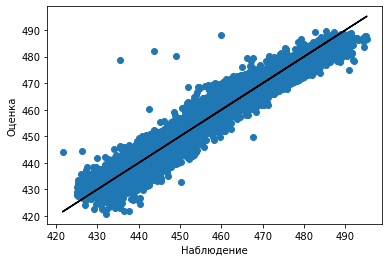

In [47]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')